# Gradient Descent Variants

Develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
np.random.seed(1)
X = np.array(np.random.uniform(0,20,(40,)))
y = -2*X + 1

In [3]:
X

array([8.34044009e+00, 1.44064899e+01, 2.28749635e-03, 6.04665145e+00,
       2.93511782e+00, 1.84677190e+00, 3.72520423e+00, 6.91121454e+00,
       7.93534948e+00, 1.07763347e+01, 8.38389029e+00, 1.37043900e+01,
       4.08904499e+00, 1.75623487e+01, 5.47751864e-01, 1.34093502e+01,
       8.34609605e+00, 1.11737966e+01, 2.80773877e+00, 3.96202978e+00,
       1.60148914e+01, 1.93652315e+01, 6.26848356e+00, 1.38464523e+01,
       1.75277830e+01, 1.78921333e+01, 1.70088423e+00, 7.81095665e-01,
       3.39660839e+00, 1.75628501e+01, 1.96693668e+00, 8.42215250e+00,
       1.91577906e+01, 1.06633057e+01, 1.38375423e+01, 6.31031262e+00,
       1.37300186e+01, 1.66925134e+01, 3.65765547e-01, 1.50028863e+01])

In [4]:
y

array([-15.68088019, -27.81297974,   0.99542501, -11.09330291,
        -4.87023563,  -2.69354379,  -6.45040846, -12.82242908,
       -14.87069897, -20.55266936, -15.76778058, -26.40878002,
        -7.17808999, -34.12469746,  -0.09550373, -25.81870041,
       -15.69219209, -21.34759314,  -4.61547754,  -6.92405956,
       -31.02978275, -37.73046303, -11.53696713, -26.69290463,
       -34.05556609, -34.78426654,  -2.40176845,  -0.56219133,
        -5.79321678, -34.12570014,  -2.93387335, -15.844305  ,
       -37.31558121, -20.3266114 , -26.67508456, -11.62062524,
       -26.46003711, -32.38502688,   0.26846891, -29.0057726 ])

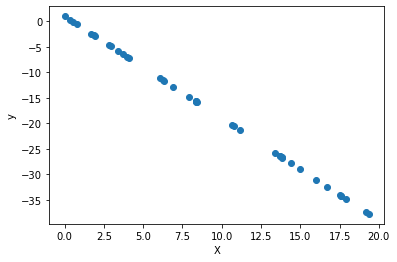

In [5]:
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(X, y);

## 1. Gradient Descent Batch

In [6]:
def gradient_descent_LR(X, y, alpha=0.07, epochs=2000):
    """ 
    This function implemented to apply gradient descent for single variable linear regression 
    
    parameters : Input data(X), Target lables(y), learning rate(alpha), max. number of iterations
    
    return : 
        - theta_0, theta_1 [all values till converge]
        - their equivalent losses values (cost_fun)
        - all hypothesis output (hx)
        - theta_0, theta_1 (optimum values)
        
    --stop criterie (number of iteration)--
    """
    
    #Normalize input data
    norm = np.linalg.norm(X)
    X = X/norm
    
    
    #create lists to store all values of loss function, parameters, and hypothesis func values
    loss_val, theta_0_val, theta_1_val, hx_val = [],[],[],[]
    
    
    #Initialize parameters
    theta_0, theta_1 = 0,0
    
    
    #hypothesis function
    hx = theta_0 + theta_1 * X
    
    
    m = len(X)
    #cost(loss) function
    cost_func = (1/(2*m)) * (np.sum((hx-y)**2))
    
    
    #Calculate gradient
    gradient_1 = (1/m) * (np.sum((hx-y)))
    gradient_2 = (1/m) * (np.sum((hx-y)*X))
    
    
    #update paramaters
    theta_0 = theta_0 - (alpha * gradient_1)
    theta_1 = theta_1 - (alpha * gradient_2)
    
    
    #Repeat the above till achieve maximum itertions
    for i in range(epochs):
        hx = theta_0 + theta_1 * X
        hx_val.append(hx)
        
        cost_func = (1/2*m) * (np.sum((hx-y)**2))
        loss_val.append(cost_func)
        
        gradient_1 = (1/m) * (np.sum((hx-y)))
        gradient_2 = (1/m) * (np.sum((hx-y)*X))
        
        theta_0 = theta_0 - (alpha * gradient_1)
        theta_1 = theta_1 - (alpha * gradient_2)
    
        theta_0_val.append(theta_0)
        theta_1_val.append(theta_1)
        
    return theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1

#### Try your function with any input parameterss of your choice.

In [7]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = gradient_descent_LR(X, y)

In [8]:
#Normalize input
x_norm = X / np.linalg.norm(X)

In [9]:
y_pred = theta_0 + theta_1*x_norm

In [10]:
y_pred

array([-16.31486427, -24.23862752,  -5.42317205, -13.31860825,
        -9.25417476,  -7.83252546, -10.28622327, -14.44794175,
       -15.78571561, -19.49674584, -16.37162098, -23.32151123,
       -10.76148942, -28.36096073,  -6.1356836 , -22.93611618,
       -16.32225234, -20.0159295 ,  -9.08778618, -10.5955761 ,
       -26.3395982 , -30.71597213, -13.60837592, -23.50707978,
       -28.31580939, -28.79174102,  -7.64196003,  -6.44048839,
        -9.85699573, -28.36161561,  -7.98949042, -16.42160091,
       -30.44500293, -19.349102  , -23.49544107, -13.66301503,
       -23.35498846, -27.22474043,  -5.8979644 , -25.01766895])

#### Calculate r2 score

In [11]:
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred - y)**2)
R_2 = 1 - (ss_res/ss_tot)

In [12]:
R_2

0.8796613559058616

#### Plot loss vs. epochs

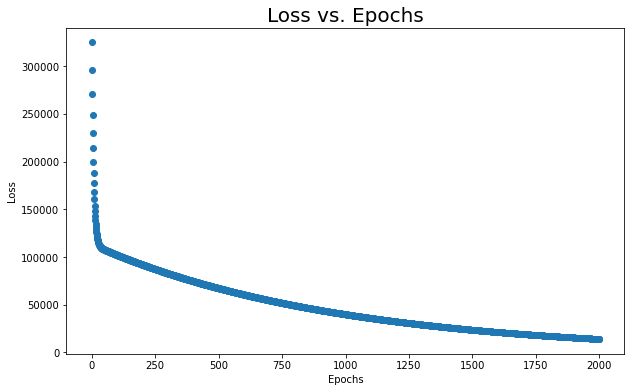

In [13]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.scatter(range(2000), loss_val);

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

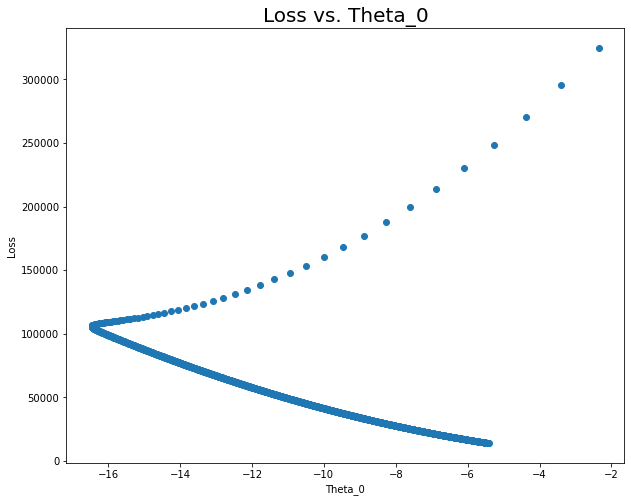

In [14]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.scatter(theta_0_val, loss_val);

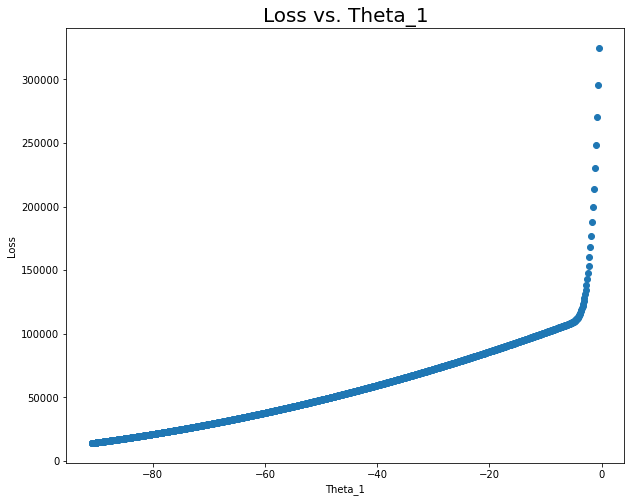

In [15]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.scatter(theta_1_val, loss_val);

#### Plot all regression lines till converge

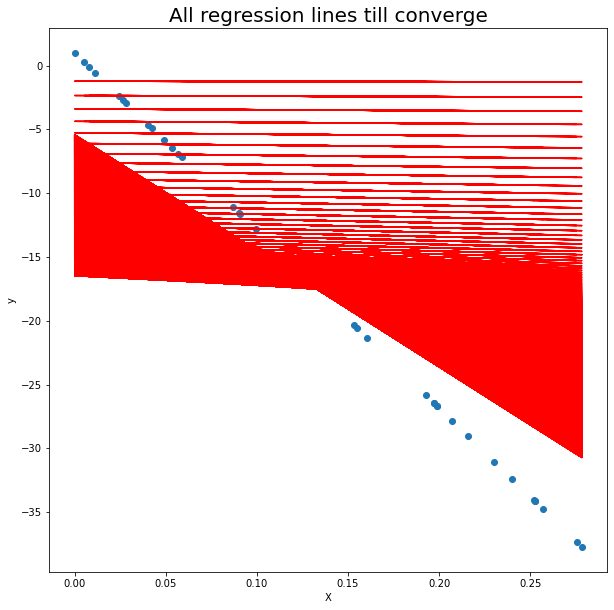

In [16]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(2000):
    plt.plot(x_norm, hx_val[i], color="red")

#### Plot the best regression line

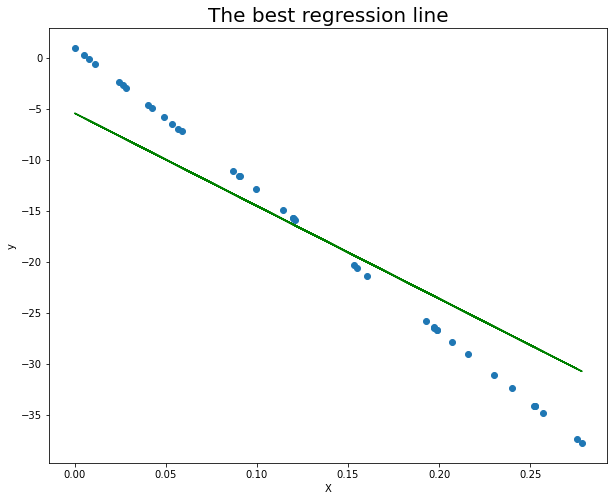

In [17]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### Try different learning rate and number of iterations then see the difference in output.

#### <font color='red'>learning rate = 0.07 <br>epochs=5000</font>

In [18]:
learning_rate = 0.07
epochs = 5000

In [19]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = gradient_descent_LR(X, y, learning_rate, epochs)

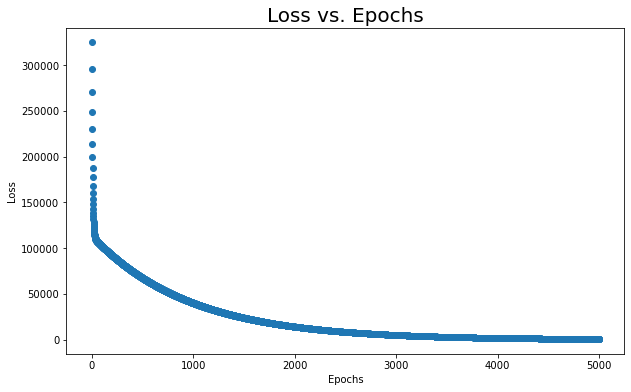

In [20]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.scatter(range(epochs), loss_val);

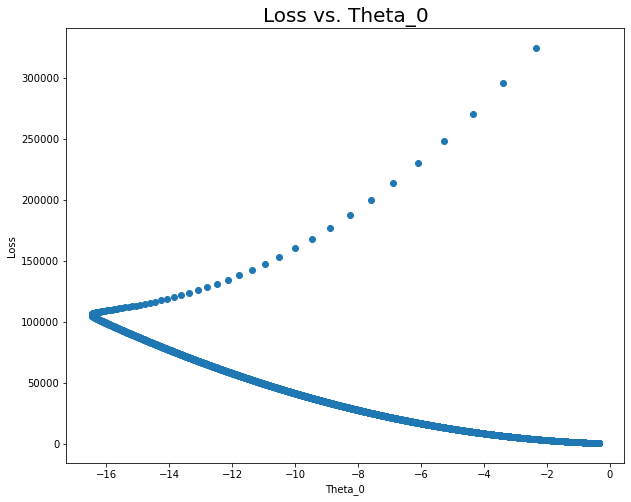

In [21]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.scatter(theta_0_val, loss_val);

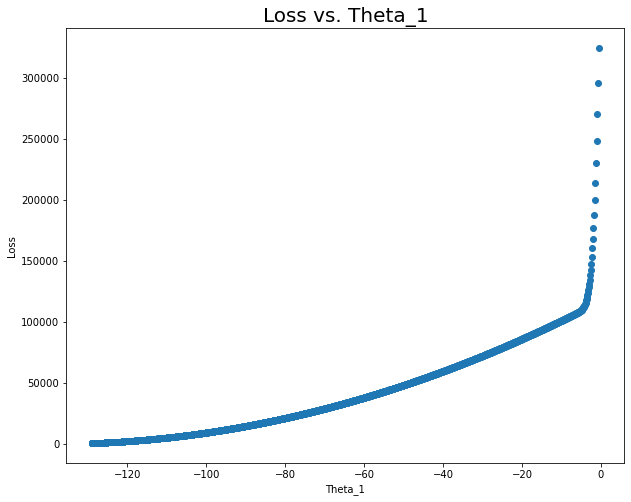

In [22]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.scatter(theta_1_val, loss_val);

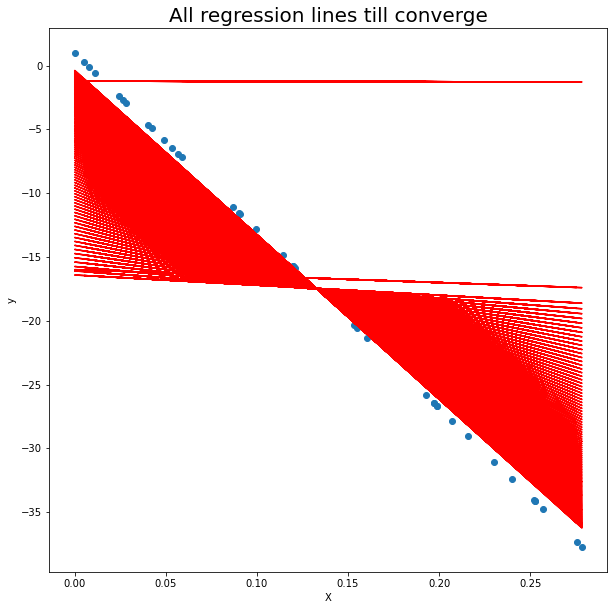

In [23]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(0,epochs,40):
    plt.plot(x_norm, hx_val[i], color="red")

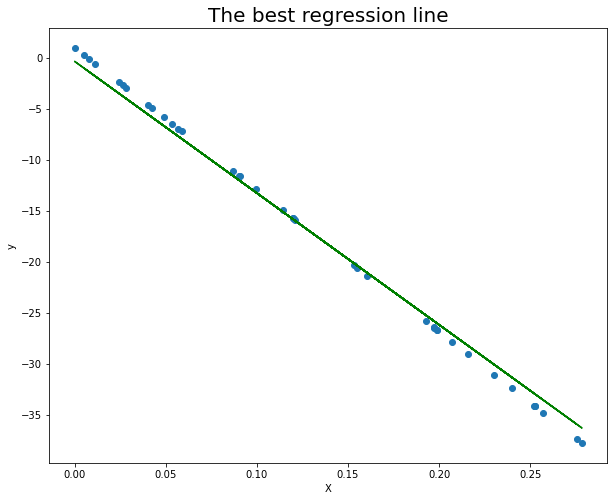

In [24]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### <font color='red'>learning rate = 0.05 <br>epochs=1000</font>

In [25]:
learning_rate = 0.05
epochs = 1000

In [26]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = gradient_descent_LR(X, y, learning_rate, epochs)

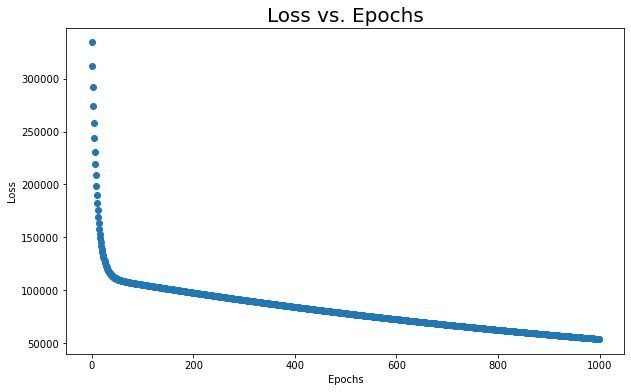

In [27]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.scatter(range(epochs), loss_val);

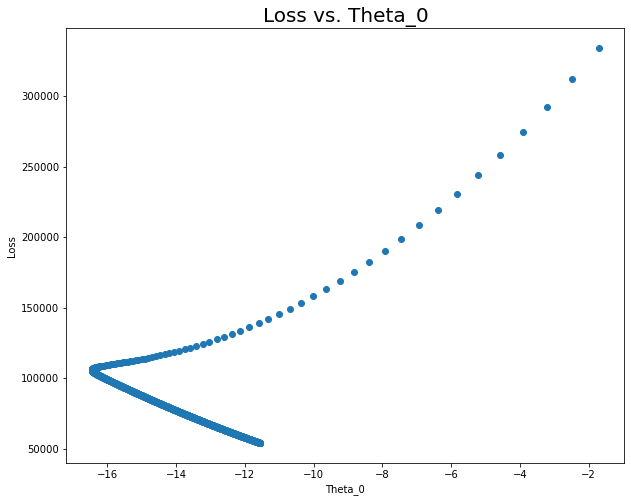

In [28]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.scatter(theta_0_val, loss_val);

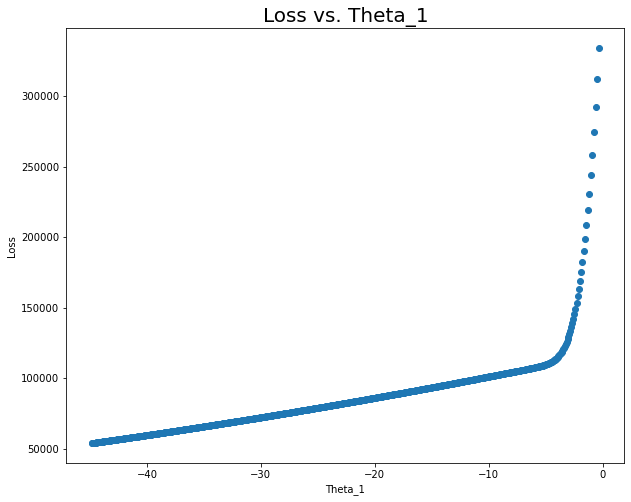

In [29]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.scatter(theta_1_val, loss_val);

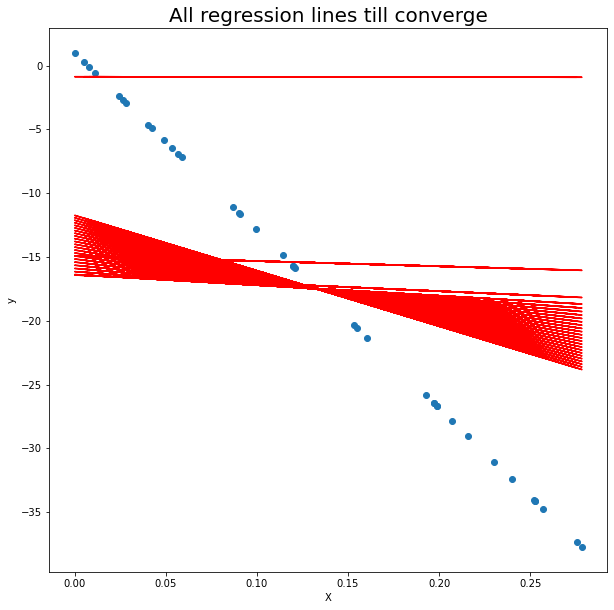

In [30]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(0,epochs,40):
    plt.plot(x_norm, hx_val[i], color="red")

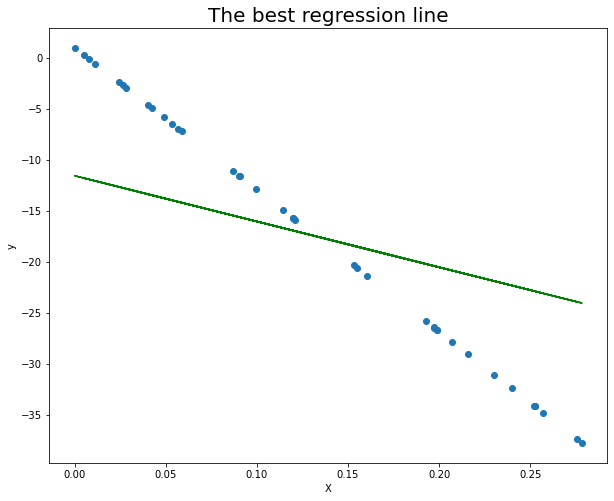

In [31]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### <font color='red'>learning rate = 0.01 <br>epochs=8000</font>

In [32]:
learning_rate = 0.01
epochs = 8000

In [33]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = gradient_descent_LR(X, y, learning_rate, epochs)

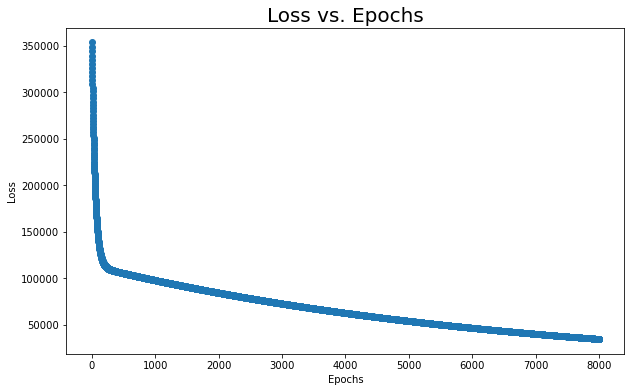

In [34]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.scatter(range(epochs), loss_val);

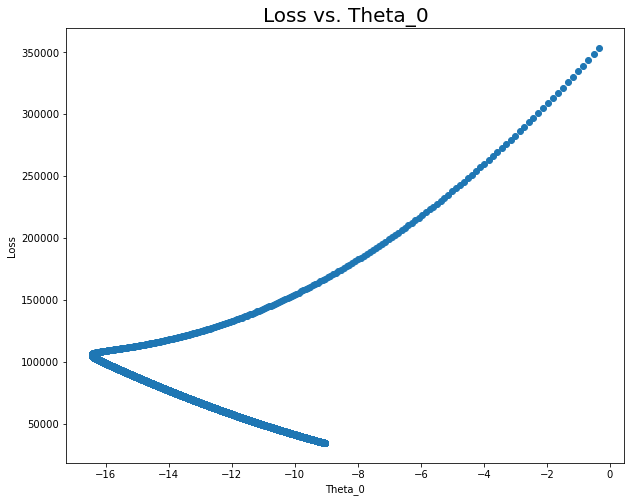

In [35]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.scatter(theta_0_val, loss_val);

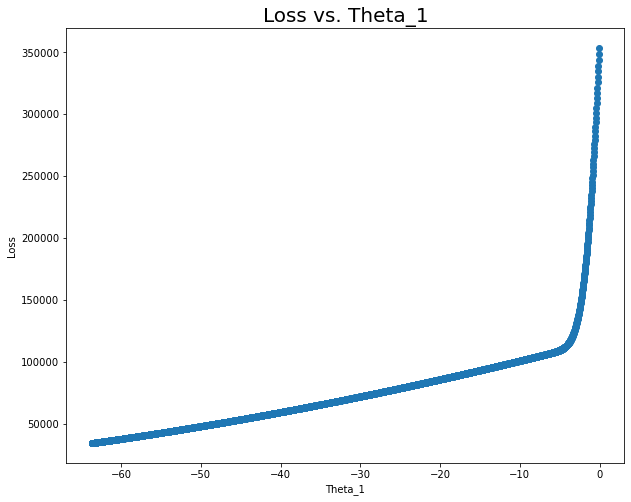

In [36]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.scatter(theta_1_val, loss_val);

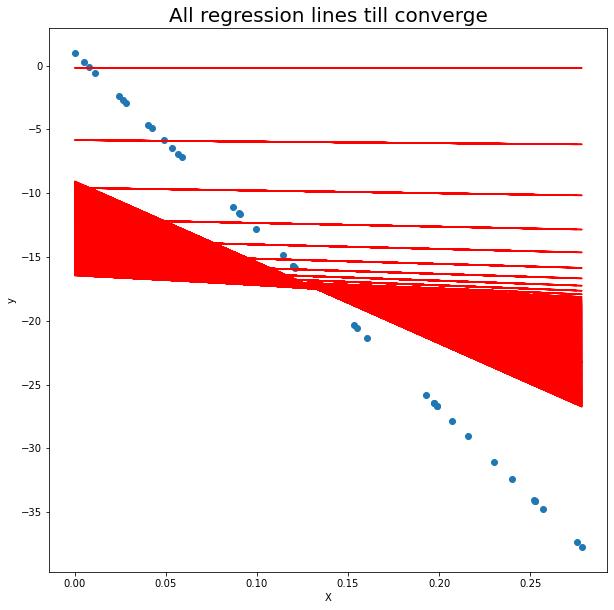

In [37]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(0,epochs,40):
    plt.plot(x_norm, hx_val[i], color="red")

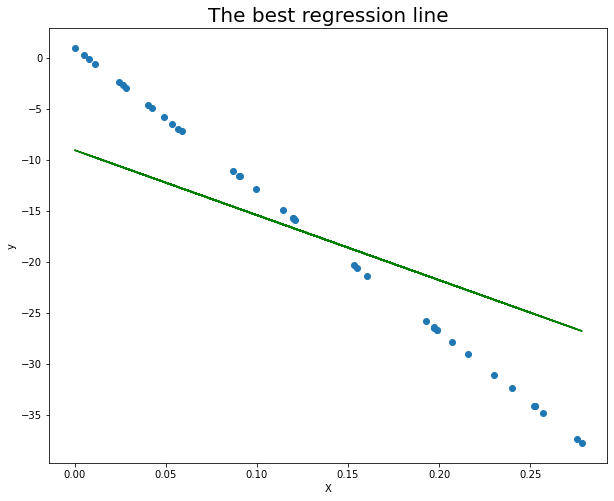

In [38]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### <font color='red'>learning rate = 0.5 <br>epochs=1000</font>

In [39]:
learning_rate = 0.5
epochs = 1000

In [40]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = gradient_descent_LR(X, y, learning_rate, epochs)

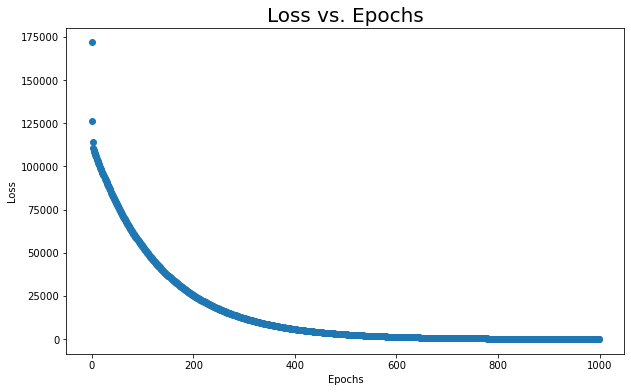

In [41]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.scatter(range(epochs), loss_val);

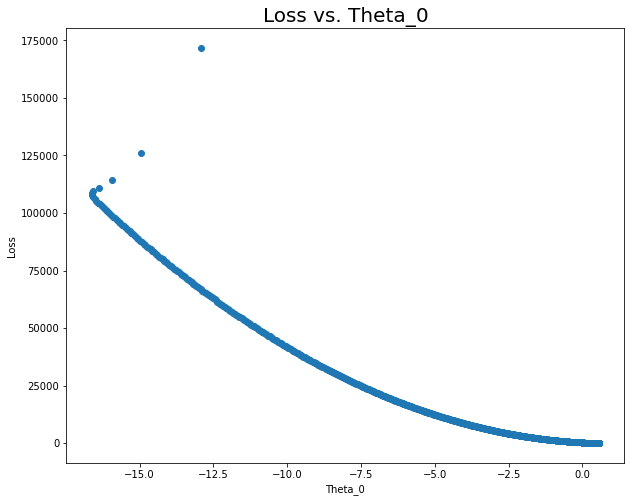

In [42]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.scatter(theta_0_val, loss_val);

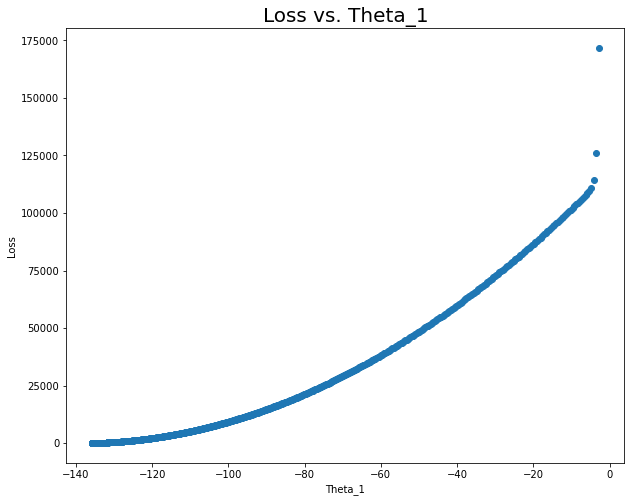

In [43]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.scatter(theta_1_val, loss_val);

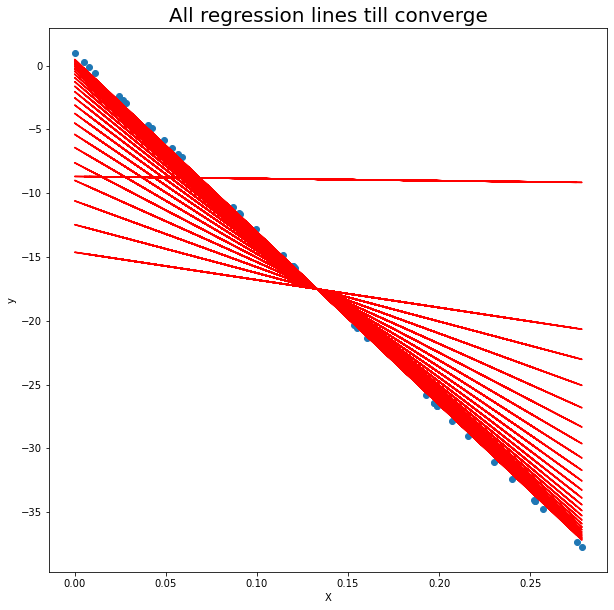

In [44]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(0,epochs,40):
    plt.plot(x_norm, hx_val[i], color="red")

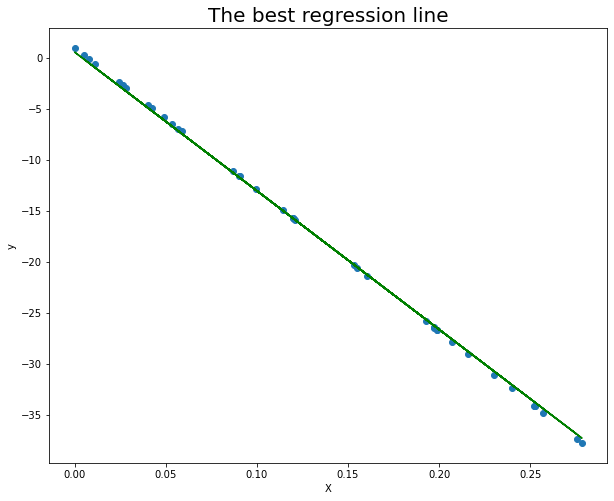

In [45]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

## 2. Mini-Batch GD

In [46]:
def hypothesis(theta_0, theta_1, X):
    hx = theta_0 + theta_1*X 
    return hx


def cost_func(theta_0, theta_1, X, y):
    m = len(X)
    hx = hypothesis(theta_0,theta_1,X)
    func = (1/(2*m)) * (np.sum((hx-y)**2))
    return func
    
    
def gradients(theta_0, theta_1, X, y):
    m = len(X)
    hx = hypothesis(theta_0,theta_1,X)
    gradient_1 = (1/m) * (np.sum(hx-y))
    gradient_2 = (1/m) * (np.sum((hx-y)*X))
    return gradient_1, gradient_2


def create_mini_batches(X, y, batch_size):
    """ This function creates a list containing mini-batches """
    mini_batches = []
    num_mini_batches = len(X) // batch_size
    
    i=0
    for i in range(num_mini_batches):
        x_mini = X[i*batch_size : (i+1)*batch_size]
        y_mini = y[i*batch_size : (i+1)*batch_size]
        mini_batches.append((x_mini,y_mini))
        
    m = len(X)    
    if m % batch_size != 0:
        x_mini = X[i*batch_size : m]
        y_mini = y[i*batch_size : m]
        mini_batches.append((x_mini,y_mini))
    return mini_batches

In [47]:
def Mini_Batch_GD_LR(X, y, alpha=0.05, batch_size=10, max_iter=800):
    """ 
    This function implemented to apply mini batch gradient descent for single variable linear regression 
    
    Parameters : Input data(X), Target lables(y), learning rate(alpha), batch size, maximum iterations
    
    return : 
        - theta_0, theta_1 [all values till converge]
        - their equivalent losses values (cost_fun)
        - input batches x_batches
        - all hypothesis output (hx)
        - theta_0, theta_1 (optimum values)
    """
    
    #Normalize input data
    norm = np.linalg.norm(X)
    X = X/norm
    
    #create lists to store all values of loss function, parameters, and hypothesis func values
    loss_val, theta_0_val, theta_1_val, hx_val, x_batches = [],[],[],[],[]
    
    #Initialize parameters
    theta_0, theta_1 = 0,0
    
    for iteration in range(max_iter):
        mini_batches = create_mini_batches(X, y, batch_size)
        for batch in mini_batches:
            x_mini, y_mini = batch
            x_batches.append(x_mini)
            
            hx = hypothesis(theta_0, theta_1, x_mini)
            hx_val.append(hx)
            
            grad = gradients(theta_0, theta_1, x_mini, y_mini)
            theta_0 = theta_0 - (alpha * grad[0])
            theta_1 = theta_1 - (alpha * grad[1])
            
            theta_0_val.append(theta_0)
            theta_1_val.append(theta_1)
            
            loss_val.append(cost_func(theta_0, theta_1, x_mini, y_mini))
    return theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1, x_batches

In [48]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1, x_batches = Mini_Batch_GD_LR(X,y)

In [49]:
y_pred_mini_batch = hypothesis(theta_0,theta_1,x_norm)
y_pred_mini_batch

array([-16.28805216, -24.80386321,  -4.5825544 , -13.06792186,
        -8.69980199,  -7.17192989,  -9.80896312, -14.28163691,
       -15.71936657, -19.70767758, -16.34904962, -23.81822181,
       -10.3197402 , -29.23420894,  -5.34830339, -23.40403081,
       -16.29599225, -20.26565361,  -8.52098119, -10.14143017,
       -27.06181423, -31.7651821 , -13.3793404 , -24.01765568,
       -29.18568398, -29.69717627,  -6.9671258 ,  -5.67588259,
        -9.34766455, -29.23491275,  -7.34062296, -16.40276394,
       -31.47396662, -19.54900209, -24.00514735, -13.43806203,
       -23.85420039, -28.01309252,  -5.09282228, -25.64111307])

#### Calculate R2 score

In [50]:
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_mini_batch - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.9110776807606795

#### Plot loss vs. epochs

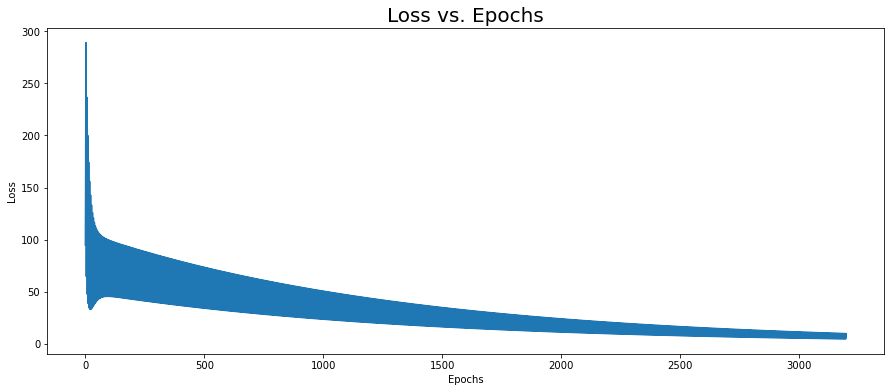

In [51]:
plt.figure(figsize=(15,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

#### Plot loss vs. Theta_0 and Theta_1

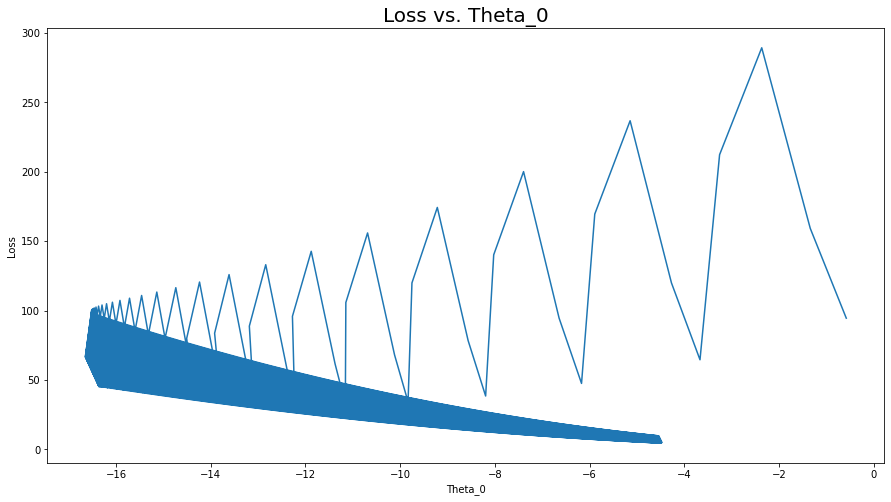

In [52]:
plt.figure(figsize=(15,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

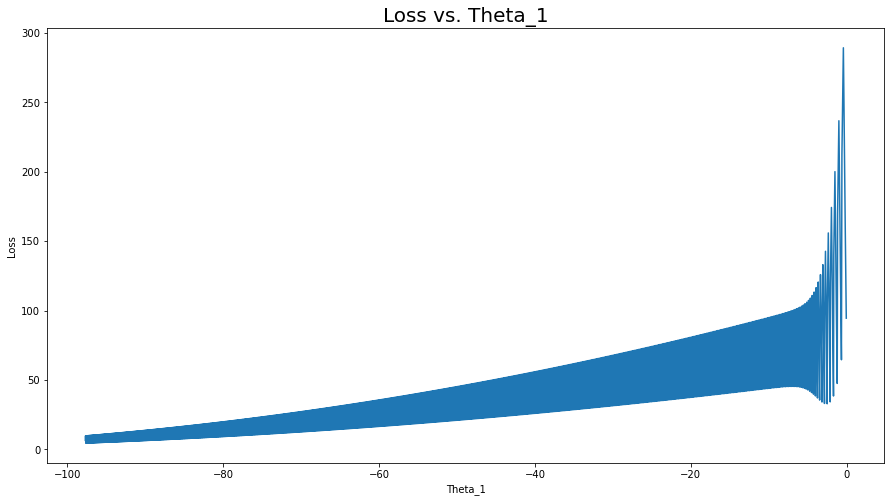

In [53]:
plt.figure(figsize=(15,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

#### Plot all regression lines

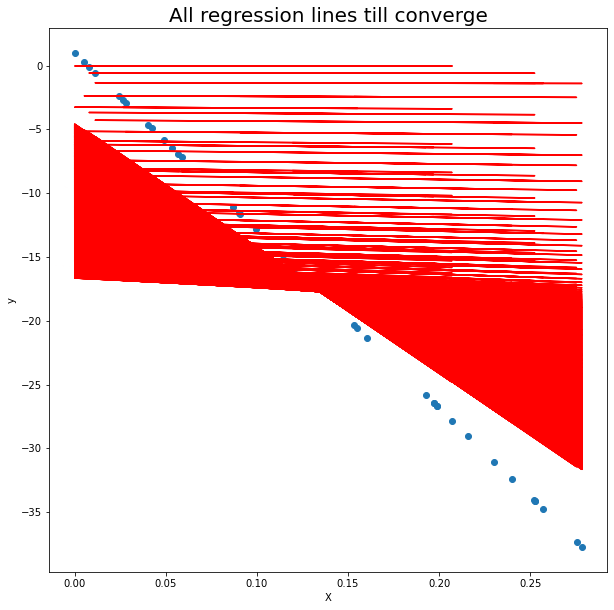

In [54]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(loss_val)):
    plt.plot(x_batches[i],hx_val[i], color="red")

#### Plot the best regression line

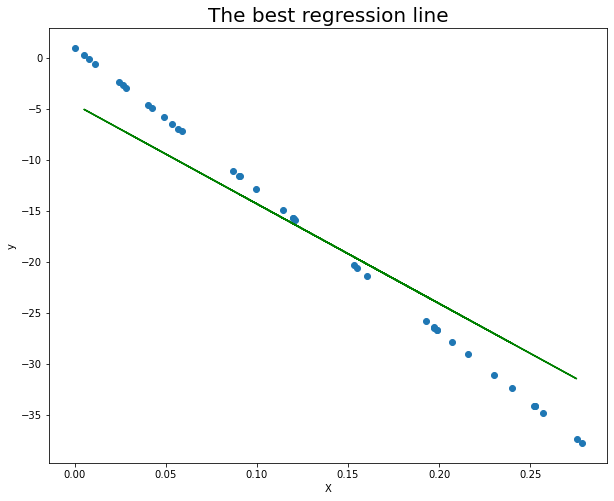

In [55]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_batches[-1], hx_val[-1], color='green');

#### Try using different batch sizes

#### <font color='red'>learning rate = 0.05 <br>Batch size = 12<br>epochs = 800</font>

In [56]:
learning_rate = 0.05
batch_size = 12
epochs=800

In [57]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1, x_batches = Mini_Batch_GD_LR(X,y,learning_rate,batch_size,epochs)

In [58]:
y_pred_mini_batch = theta_0 + theta_1*x_norm
y_pred_mini_batch

array([-16.28991249, -24.98758897,  -4.33442968, -13.00101242,
        -8.53960608,  -6.97910442,  -9.67245468, -14.24064782,
       -15.70908193, -19.78256815, -16.35221263, -23.98089802,
       -10.19414002, -29.51255009,  -5.11653217, -23.55786147,
       -16.29802216, -20.35246042,  -8.35696634, -10.01202196,
       -27.29376127, -32.09757524, -13.31908167, -24.18459103,
       -29.46298883, -29.98540465,  -6.76992649,  -5.45110722,
        -9.20130452, -29.51326893,  -7.15140014, -16.40707408,
       -31.8001405 , -19.62050395, -24.17181557, -13.37905738,
       -24.01764496, -28.26535526,  -4.85559496, -25.84271931])

In [59]:
#R2 score
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_mini_batch - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.9197461203477982

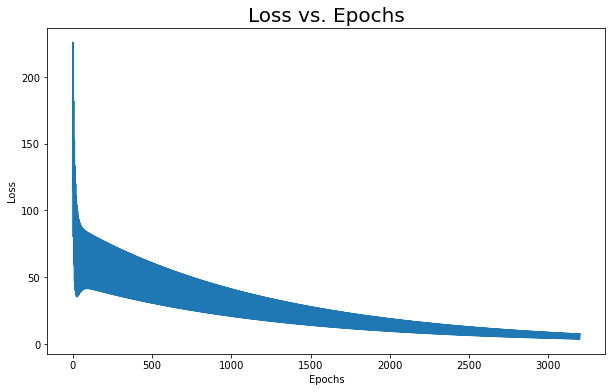

In [60]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

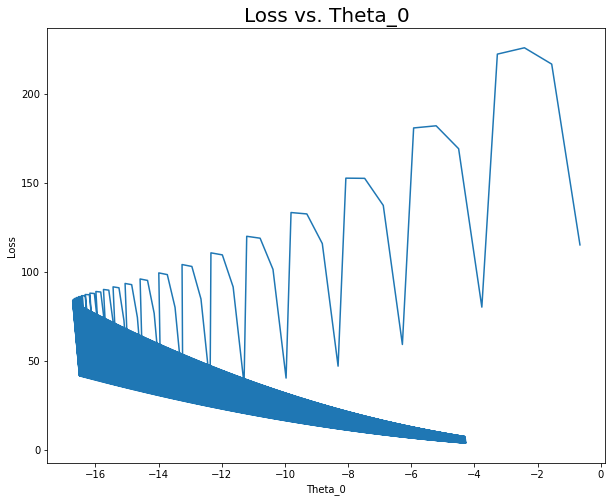

In [61]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

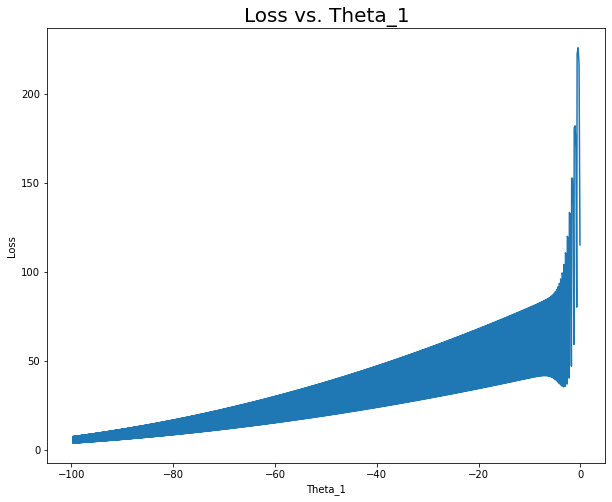

In [62]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

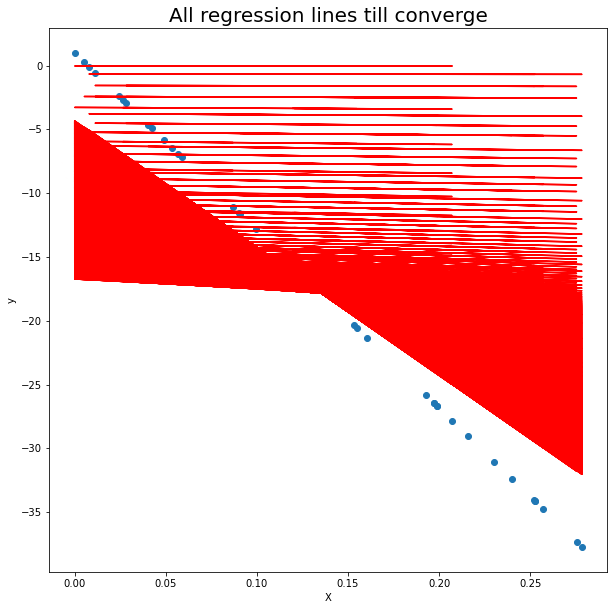

In [63]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(hx_val)):
    plt.plot(x_batches[i],hx_val[i], color="red")

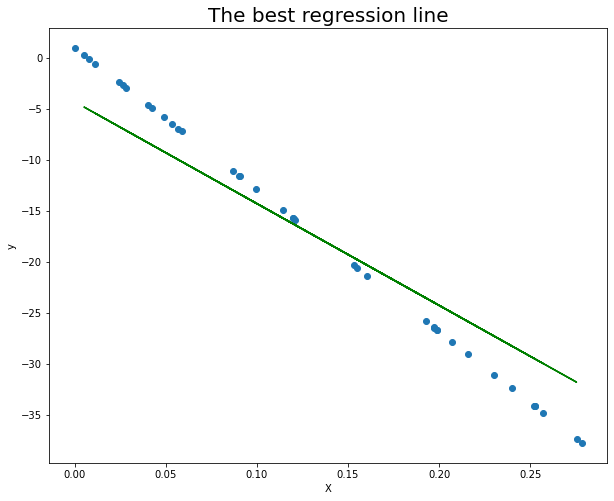

In [64]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_batches[-1],hx_val[-1], color='green');

#### <font color='red'>learning rate = 0.05 <br>Batch size = 5<br>epochs = 800</font>

In [65]:
learning_rate = 0.05
batch_size = 5
epochs=800

In [66]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1, x_batches = Mini_Batch_GD_LR(X,y,learning_rate,batch_size,epochs)

In [67]:
y_pred_mini_batch = theta_0 + theta_1*x_norm
y_pred_mini_batch

array([-15.87781905, -26.91805513,  -0.70234628, -11.70311408,
        -6.04010979,  -4.05931564,  -7.47807038, -13.27662254,
       -15.14055244, -20.31115743, -15.95689858, -25.64023043,
        -8.1402621 , -32.66173152,  -1.69509372, -25.10325675,
       -15.88811291, -21.03453974,  -5.80827939,  -7.90909388,
       -29.84535263, -35.94298576, -12.10684945, -25.89878443,
       -32.59882183, -33.26194077,  -3.79379947,  -2.11978042,
        -6.88002457, -32.66264396,  -4.27801604, -16.02653597,
       -35.56544243, -20.10544421, -25.88256813, -12.18297851,
       -25.68687449, -31.07862763,  -1.36387786, -28.00349914])

In [68]:
#R2 score
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_mini_batch - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.9918866584146595

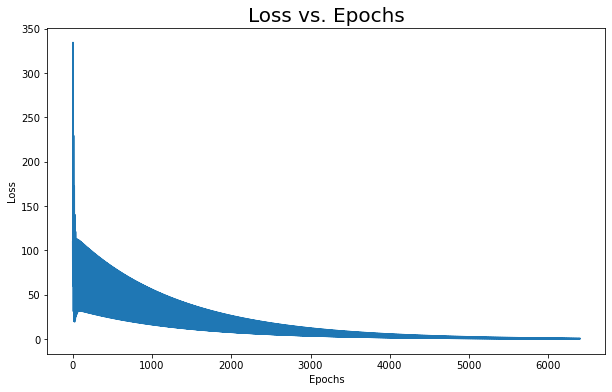

In [69]:
plt.figure(figsize=(10,6))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

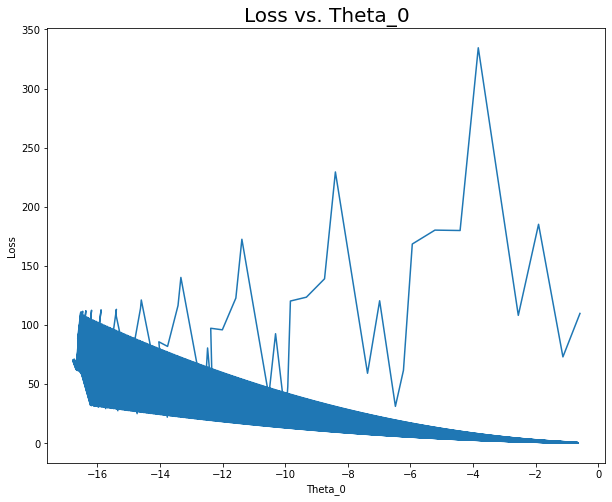

In [70]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

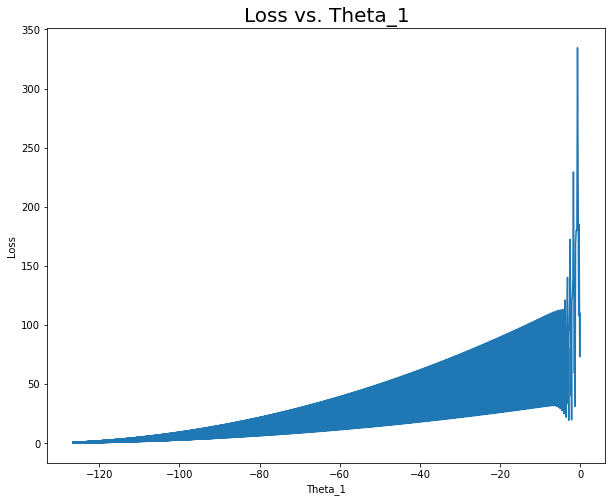

In [71]:
plt.figure(figsize=(10,8))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

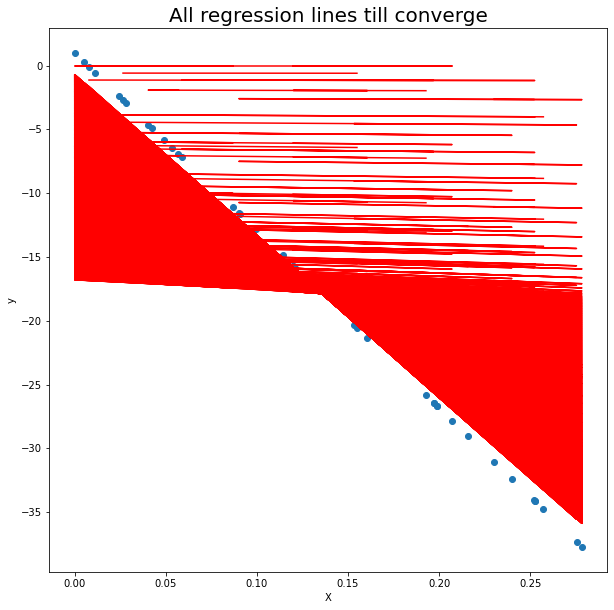

In [72]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(hx_val)):
    plt.plot(x_batches[i],hx_val[i], color="red")

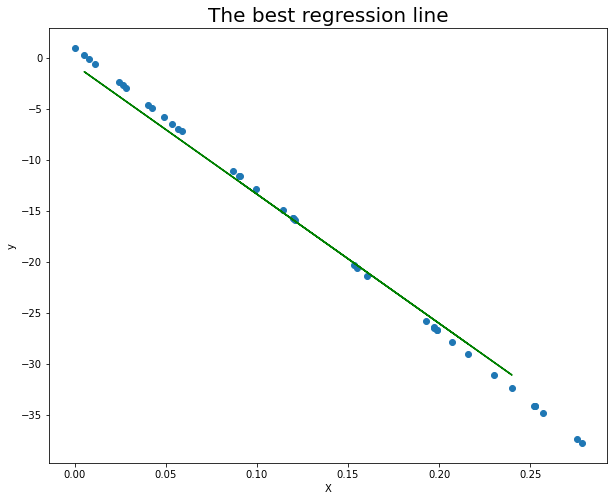

In [73]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_batches[-1], hx_val[-1], color='green');

## 3. Stochastic GD

In [75]:
def Stochastic_GD_LR(X, y, alpha=0.05, max_iter=100):
    """ 
    This function implemented to apply stochastic gradient descent for single variable linear regression 
    
    Parameters : Input data(X), Target lables(y), learning rate(alpha), maximum iterations
    
    return : 
        - theta_0, theta_1 [all values till converge]
        - their equivalent losses values (cost_fun)
        - all hypothesis output (hx)
        - theta_0, theta_1 (optimum values)
    """
    batch_size = 1
    
    #Normalize input data
    norm = np.linalg.norm(X)
    X = X/norm
    
    #create lists to store all values of loss function, parameters, and hypothesis func values
    loss_val, theta_0_val, theta_1_val, hx_val = [],[],[],[]
    
    #Initialize parameters
    theta_0, theta_1 = 0,0
    
    for iteration in range(max_iter):
        mini_batches = create_mini_batches(X, y, batch_size)
        for batch in mini_batches:
            x_mini, y_mini = batch
            
            #hx = hypothesis(theta_0, theta_1, x_mini)
            hx = hypothesis(theta_0, theta_1, X)
            hx_val.append(hx)
            
            grad = gradients(theta_0, theta_1, x_mini, y_mini)
            theta_0 = theta_0 - (alpha * grad[0])
            theta_1 = theta_1 - (alpha * grad[1])
            
            theta_0_val.append(theta_0)
            theta_1_val.append(theta_1)
            
            loss_val.append(cost_func(theta_0, theta_1, x_mini, y_mini))
    return theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1

In [76]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = Stochastic_GD_LR(X, y)

In [77]:
y_pred_stochastic = hypothesis(theta_0,theta_1,x_norm)
y_pred_stochastic

array([-16.41713214, -25.92557901,  -3.34719636, -12.82165102,
        -7.94436624,  -6.23839946,  -9.18281547, -14.17684138,
       -15.78215836, -20.23536231, -16.4852397 , -24.82504745,
        -9.7531307 , -30.87234295,  -4.20220401, -24.36257675,
       -16.42599777, -20.85837818,  -7.7447014 ,  -9.55403616,
       -28.44672553, -33.69833612, -13.16936971, -25.0477281 ,
       -30.81816174, -31.38927554,  -6.00972262,  -4.56796711,
        -8.66774616, -30.8731288 ,  -6.42675605, -16.54521518,
       -33.37317543, -20.05819099, -25.03376174, -13.23493616,
       -24.86521983, -29.50888849,  -3.91694305, -26.86042195])

#### Calculate R2

In [78]:
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_stochastic - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.9522948354206373

#### Plot loss vs. epochs

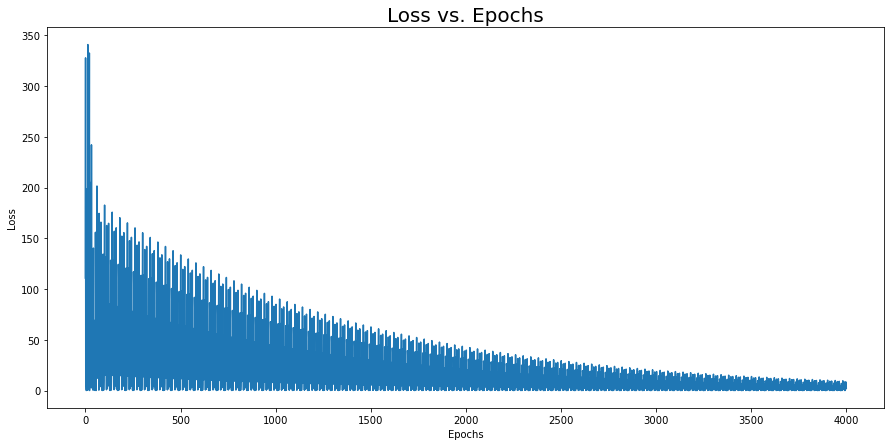

In [79]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

#### Plot loss vs. theta_0

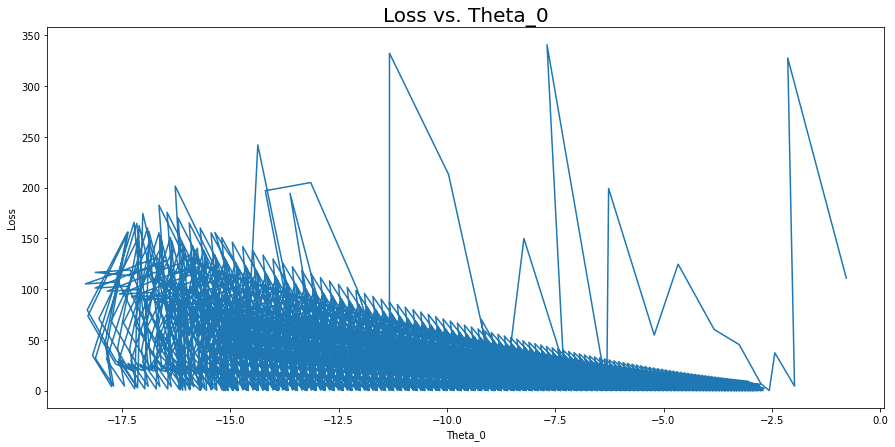

In [80]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

#### plot loss vs. theta_1

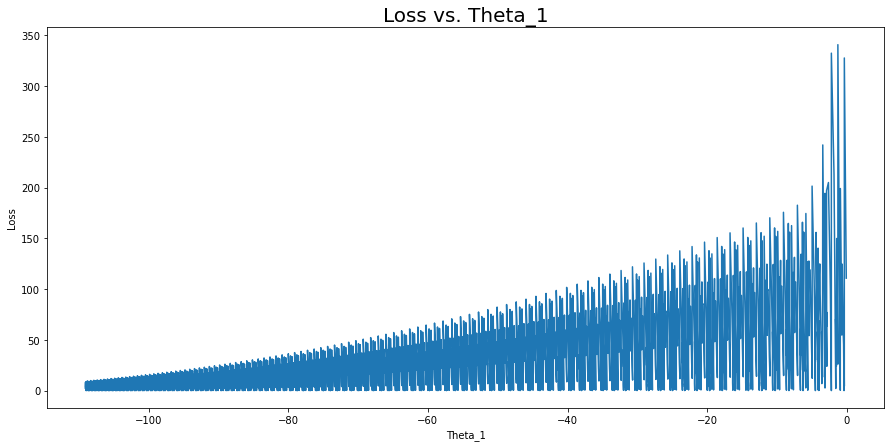

In [81]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

#### Plot all regression lines

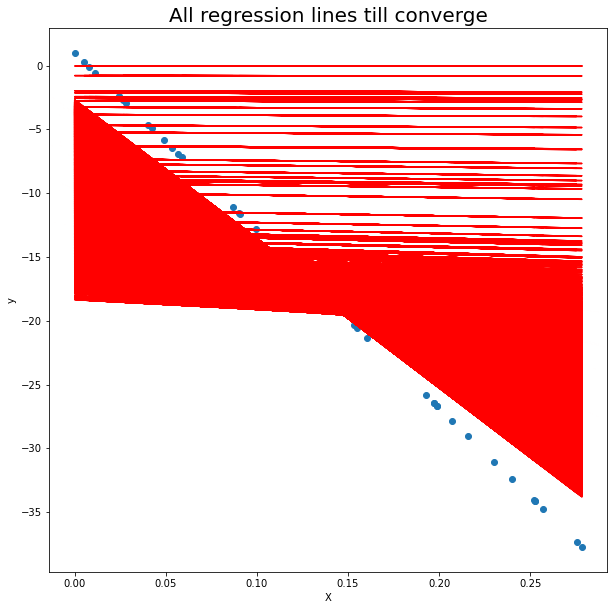

In [82]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(hx_val)):
    plt.plot(x_norm, hx_val[i], color="red")

#### Plot the best regression line

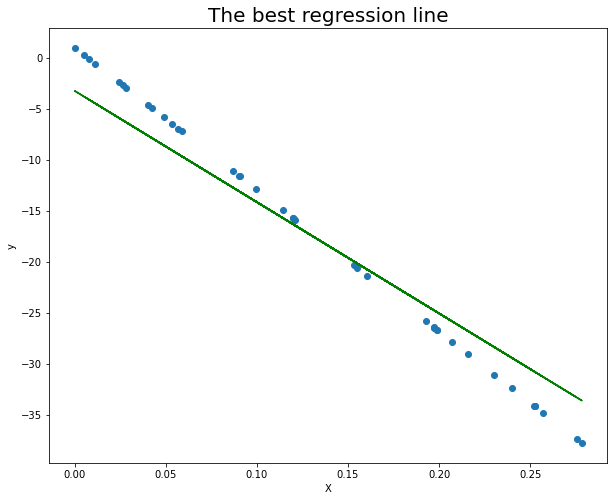

In [83]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### Try different lrearning rate

#### <font color=red> learning rate = 0.01<br>epochs = 100</font>

In [84]:
learning_rate = 0.01
epochs = 100

In [85]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = Stochastic_GD_LR(X, y, learning_rate, epochs)

In [86]:
y_pred_stochastic = hypothesis(theta_0,theta_1,x_norm)
y_pred_stochastic

array([-17.2724768 , -20.55582033, -12.75932237, -16.03092812,
       -14.34676227, -13.75767816, -14.7744088 , -16.4988863 ,
       -17.05321522, -18.59094253, -17.29599489, -20.17579789,
       -14.97134326, -22.26397789, -13.05456342, -20.01610302,
       -17.27553817, -18.80607494, -14.27781639, -14.9025943 ,
       -21.42639259, -23.23981616, -16.15099819, -20.25269132,
       -22.24526868, -22.44247889, -13.6787142 , -13.18086437,
       -14.5965512 , -22.26424925, -13.82271921, -17.3167049 ,
       -23.12753555, -18.52976384, -20.24786862, -16.17363881,
       -20.18966974, -21.79316605, -12.9560605 , -20.87862915])

#### calculate R2

In [87]:
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_stochastic - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.4671442462965185

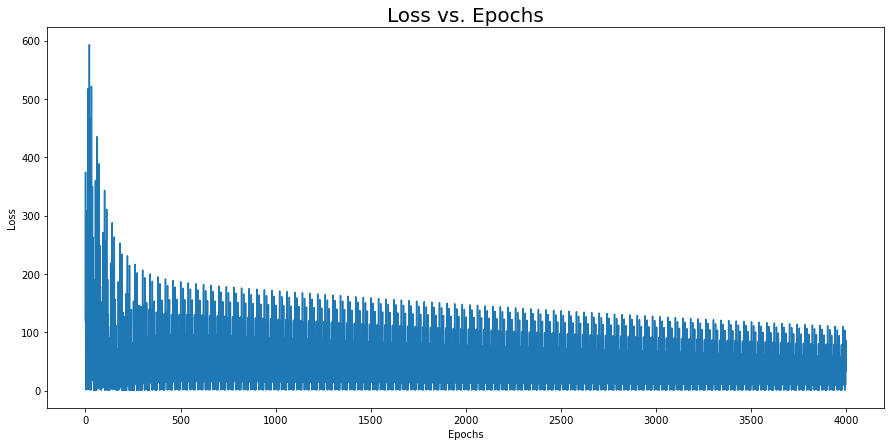

In [88]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

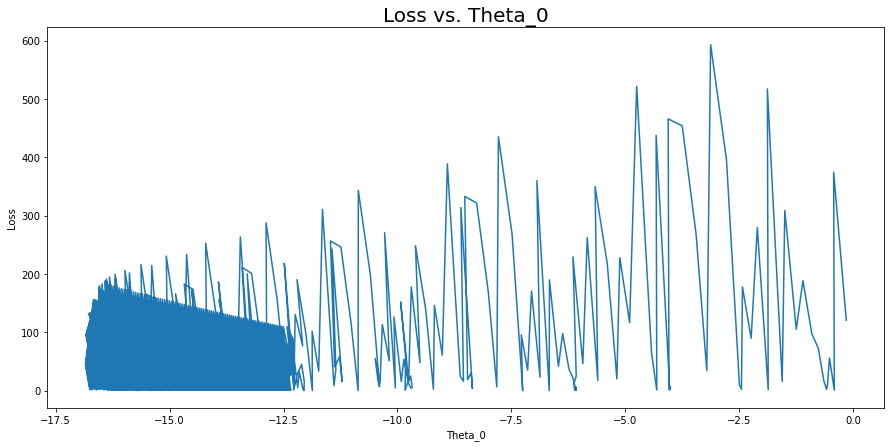

In [89]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

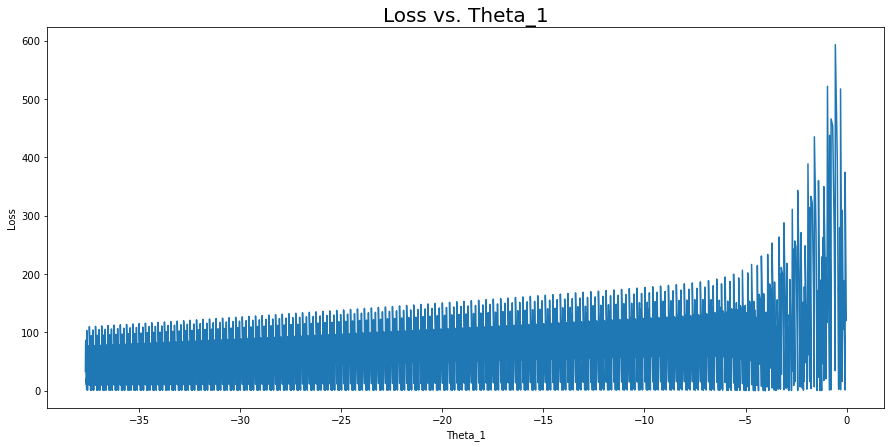

In [90]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

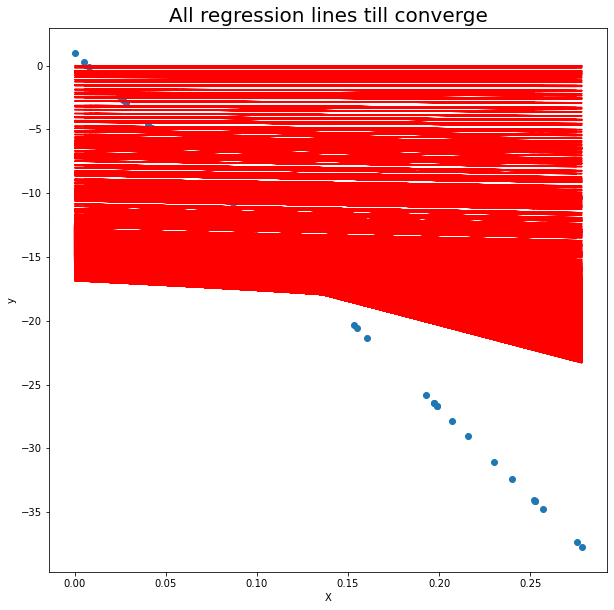

In [91]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(hx_val)):
    plt.plot(x_norm, hx_val[i], color="red")

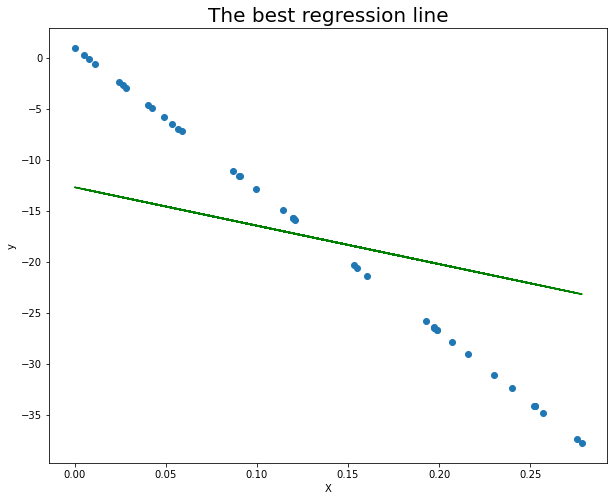

In [92]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');

#### <font color=red> learning rate = 0.1<br>epochs = 100</font>

In [93]:
learning_rate = 0.1
epochs = 100

In [94]:
theta_0_val, theta_1_val, loss_val, hx_val, theta_0, theta_1 = Stochastic_GD_LR(X, y, learning_rate, epochs)

In [95]:
y_pred_stochastic = hypothesis(theta_0,theta_1,x_norm)
y_pred_stochastic

array([-1.58838841e+01, -2.74502161e+01,  1.47393869e-02, -1.15102436e+01,
       -5.57738243e+00, -3.50219829e+00, -7.08386558e+00, -1.31587338e+01,
       -1.51114848e+01, -2.05284826e+01, -1.59667320e+01, -2.61114998e+01,
       -7.77761246e+00, -3.34675936e+01, -1.02531505e+00, -2.55489379e+01,
       -1.58946685e+01, -2.12863360e+01, -5.33450471e+00, -7.53542847e+00,
       -3.05170070e+01, -3.69052082e+01, -1.19332180e+01, -2.63823745e+01,
       -3.34016862e+01, -3.40964044e+01, -3.22402958e+00, -1.47023917e+00,
       -6.45732134e+00, -3.34685496e+01, -3.73132034e+00, -1.60396878e+01,
       -3.65096739e+01, -2.03129666e+01, -2.63653855e+01, -1.20129748e+01,
       -2.61603666e+01, -3.18090507e+01, -6.78315892e-01, -2.85873844e+01])

#### calculate R2

In [96]:
ss_tot = np.sum((y - np.mean(y))**2)
ss_res = np.sum((y_pred_stochastic - y)**2)
R_2 = 1 - (ss_res/ss_tot)
R_2

0.9977200353690521

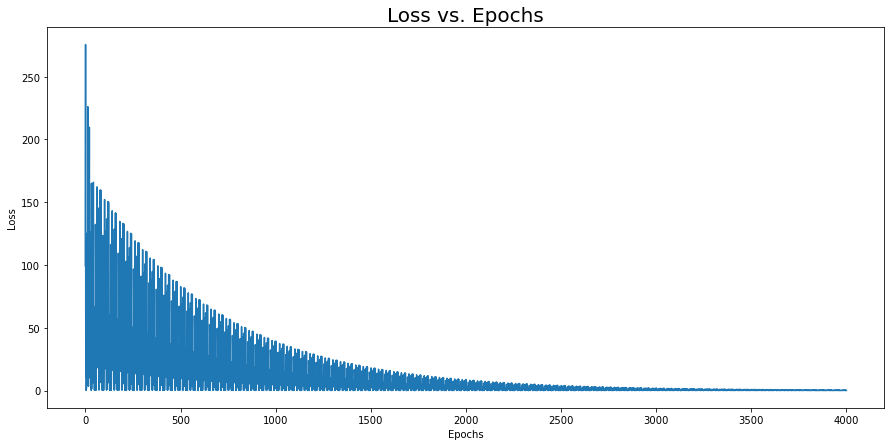

In [97]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Epochs", fontdict={'fontsize':20})
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(len(loss_val)), loss_val);

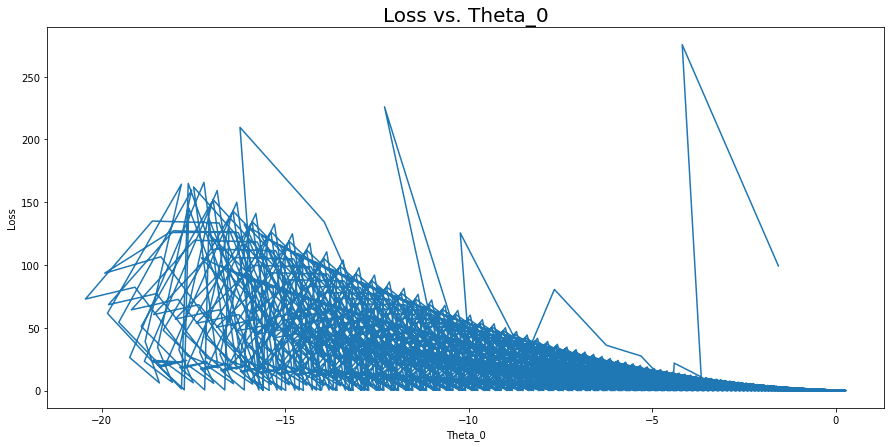

In [98]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_0", fontdict={'fontsize':20})
plt.xlabel("Theta_0")
plt.ylabel("Loss")
plt.plot(theta_0_val, loss_val);

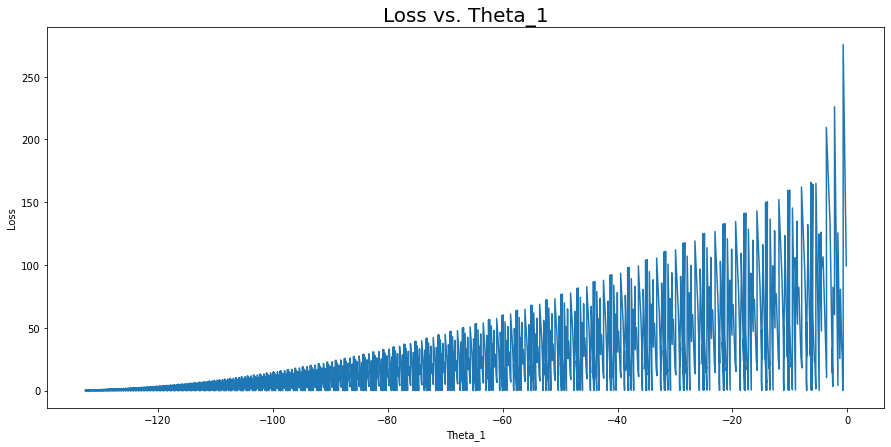

In [99]:
plt.figure(figsize=(15,7))
plt.title("Loss vs. Theta_1", fontdict={'fontsize':20})
plt.xlabel("Theta_1")
plt.ylabel("Loss")
plt.plot(theta_1_val, loss_val);

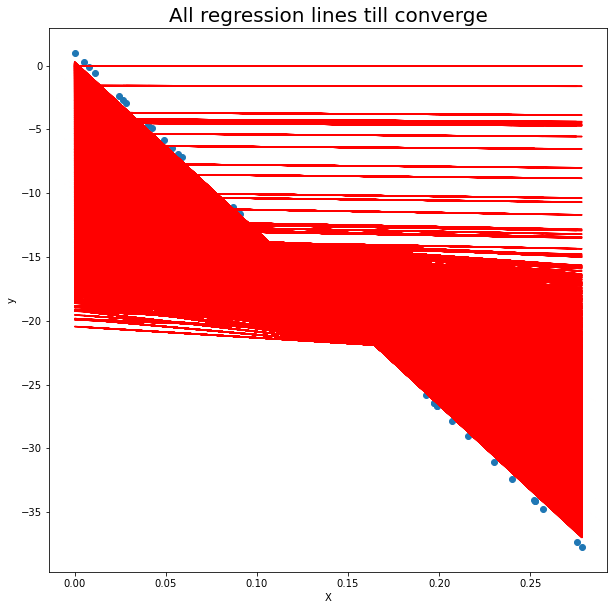

In [101]:
plt.figure(figsize=(10,10))
plt.title("All regression lines till converge", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y);
for i in range(len(hx_val)):
    plt.plot(x_norm, hx_val[i], color="red")

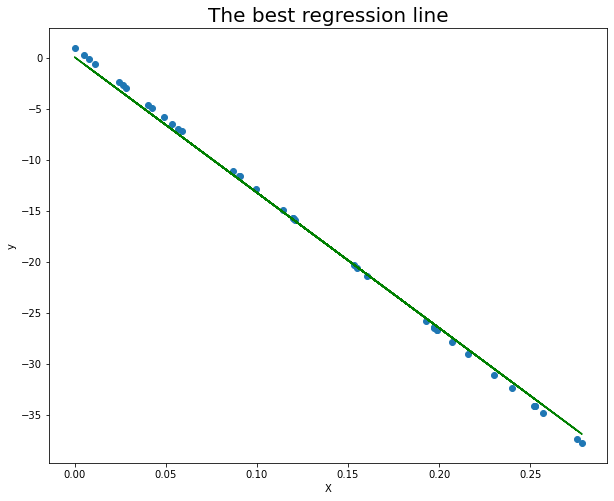

In [102]:
plt.figure(figsize=(10,8))
plt.title("The best regression line", fontdict={'fontsize':20})
plt.xlabel("X")
plt.ylabel("y")
plt.scatter(x_norm, y)
plt.plot(x_norm, hx_val[-1], color='green');